
## 1. Using Legal-BERT for Double Dissociation Analysis Synonym Masking

- This notebook demonstrates a workflow for using `Legal-BERT` (see [here](https://huggingface.co/nlpaueb/legal-bert-base-uncased)) embedding model to perform double dissociation analysis synonym selection for a term of interest via token masking.

- The Double Dissociation Analysis is recommended by Lawrence Solan as it directly helps address non-appearance fallacies in legal Corpus Linguistics (what he refers to as the **blue pitta problem**)

In [ ]:
!pip install -U getout_of_text_3 -qqq

In [ ]:
!pip install transformers torch matplotlib seaborn -qqq

In [ ]:
import getout_of_text_3 as got3

print('getout_of_text3 version:', got3.__version__)

### Set your Keyword & Statutory Language

- for n-grams, the `Legal-Bert` model can only mask single tokens, so multi-word expressions should be hyphenated, (e.g. "best-system" for "best system") or instead run multiple maskings along n different single tokens. (e.g. "best" and "system" separately).

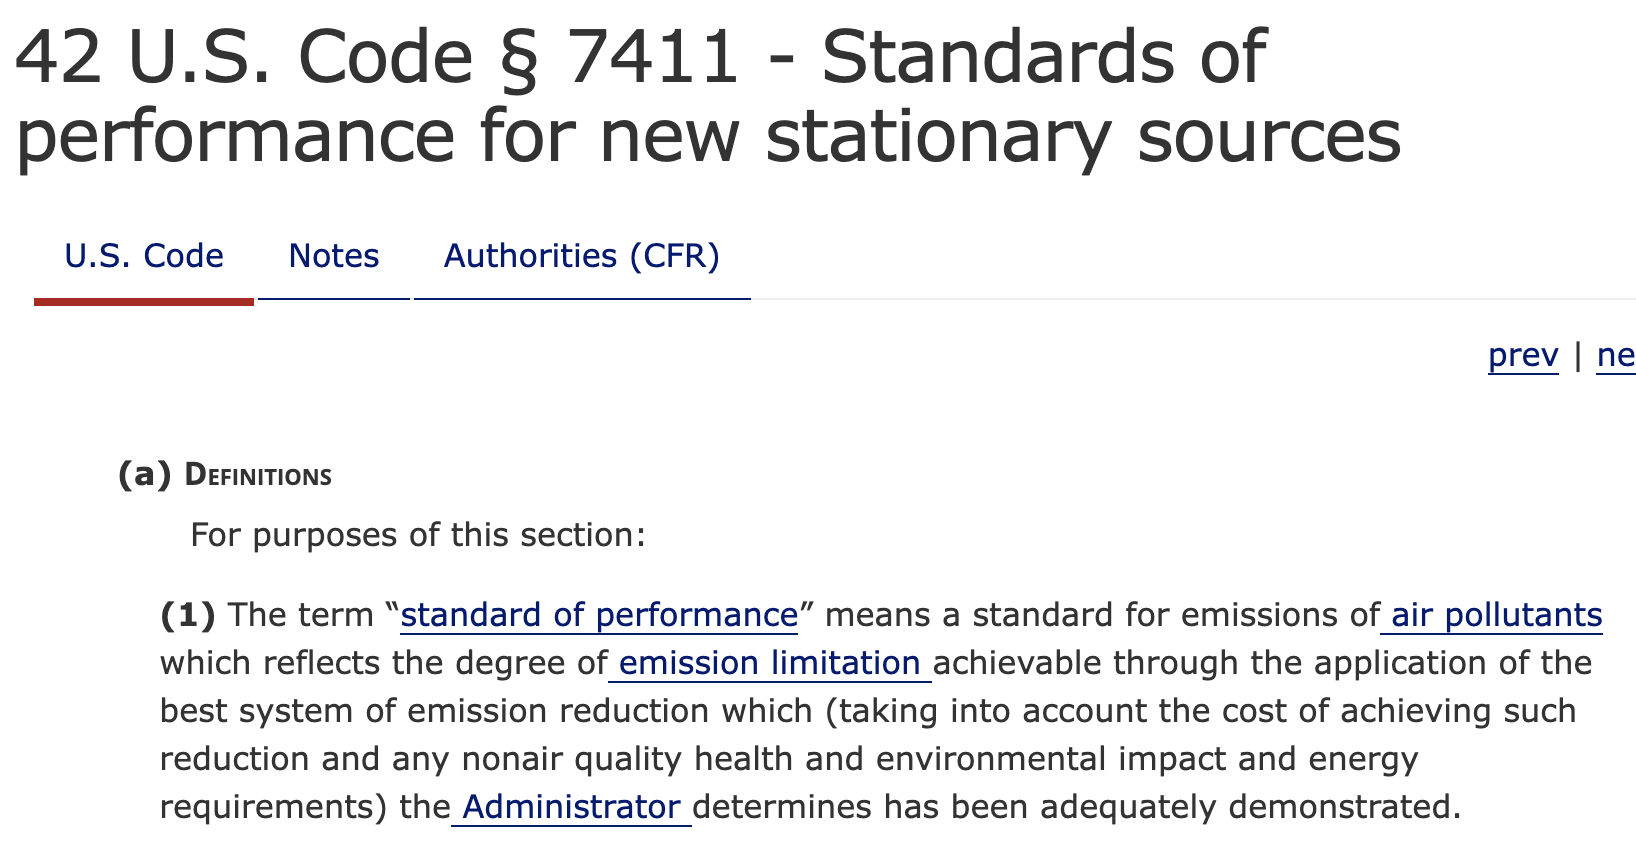

In [ ]:
keyword="best system "
mask_value="[MASK]"
statute="42 U.S. Code § §7411 - Standards of performance for new stationary sources"
statute_code="§7411(a)(1)"
statute_language="The term “standard of performance” means a standard for emissions of air pollutants which " \
"reflects the degree of emission limitation achievable through the application of the best system of emission" \
" reduction which (taking into account the cost of achieving such reduction and any nonair quality health and " \
"environmental impact and energy requirements) the Administrator determines has been adequately demonstrated."

In [ ]:
# Use the pipe function (recommended approach)
got3.embedding.legal_bert.pipe(statute_language, 
                                masked_token='best', 
                                token_mask=mask_value,
                                top_k=5, 
                                visualize=True)

In [ ]:
statement_1="The term “standard of performance” means a standard for emissions of air pollutants which reflects the degree of emission limitation achievable through the application of the [MASK] system of emission reduction which (taking into account the cost of achieving such reduction and any nonair quality health and environmental impact and energy requirements) the Administrator determines has been adequately demonstrated."
statement_2="The term “standard of performance” means a standard for emissions of air pollutants which reflects the degree of emission limitation achievable through the application of the best [MASK] of emission reduction which (taking into account the cost of achieving such reduction and any nonair quality health and environmental impact and energy requirements) the Administrator determines has been adequately demonstrated."

In [ ]:
# Use the pipe function (recommended approach)
got3.embedding.legal_bert.pipe(statement_2, 
                                masked_token='system', 
                                token_mask=mask_value,
                                top_k=5, 
                                visualize=True)

____________________

## Conclusion:

For your Double Dissociation Analysis, you can now use the top predicted synonyms from the masked token predictions. You can use as many synonyms as you want to run your analysis on alternative phrasings of your statutory language of interest!

- For this project, we opt for `best method` and `national system` given their high predicted scores from `Legal-BERT`.